In [35]:
import pandas as pd
import tensorflow as tf

In [36]:
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

url = url_white

wine_data = pd.read_csv(url, sep=';')

#### preparing data

In [37]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [38]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### split the data into training and testing sets

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_data.drop('quality', axis=1),
                                                    wine_data['quality'],
                                                    test_size=0.2,
                                                    random_state=100)

# normalizing the features
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# converting the labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train - 3, num_classes=7)
y_test = tf.keras.utils.to_categorical(y_test - 3, num_classes=7)

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(y_train.shape[1], activation=tf.nn.softmax)
])


In [41]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [42]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/100
49/49 [==============================] - 0s 5ms/step - loss: 2.2462 - accuracy: 0.2084 - val_loss: 2.2145 - val_accuracy: 0.2232
Epoch 2/100
49/49 [==============================] - 0s 1ms/step - loss: 2.1192 - accuracy: 0.2473 - val_loss: 2.0978 - val_accuracy: 0.2500
Epoch 3/100
49/49 [==============================] - 0s 1ms/step - loss: 2.0116 - accuracy: 0.2853 - val_loss: 1.9992 - val_accuracy: 0.2832
Epoch 4/100
49/49 [==============================] - 0s 1ms/step - loss: 1.9202 - accuracy: 0.3143 - val_loss: 1.9124 - val_accuracy: 0.3163
Epoch 5/100
49/49 [==============================] - 0s 1ms/step - loss: 1.8409 - accuracy: 0.3440 - val_loss: 1.8385 - val_accuracy: 0.3444
Epoch 6/100
49/49 [==============================] - 0s 1ms/step - loss: 1.7724 - accuracy: 0.3689 - val_loss: 1.7734 - val_accuracy: 0.3520
Epoch 7/100
49/49 [==============================] - 0s 1ms/step - loss: 1.7120 - accuracy: 0.3880 - val_loss: 1.7148 - val_accuracy: 0.3712
Epoch 8/100
4

In [43]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

31/31 [==============================] - 0s 667us/step - loss: 1.1141 - accuracy: 0.5337
Test loss: 1.114117980003357
Test accuracy: 0.5336734652519226


In [44]:
y_pred = model.predict(X_test)

31/31 [==============================] - 0s 600us/step


#### results

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt


def show_loss(history):
    sns.set_style("darkgrid")
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [46]:
def show_accuracy(history):
    sns.set_style("darkgrid")
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [47]:
import numpy as np


def draw_confusion_matrix(y_pred, test_y):
    y_pred_labels = np.argmax(y_pred, axis=1)

    confusion_matrix = tf.math.confusion_matrix(labels=np.argmax(test_y, axis=1),
                                                predictions=y_pred_labels).numpy()

    sns.set_style("whitegrid")
    sns.heatmap(confusion_matrix,
                annot=True,
                fmt='g',
                cmap='Blues',
                xticklabels=[3, 4, 5, 6, 7, 8, 9],
                yticklabels=[3, 4, 5, 6, 7, 8, 9])

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

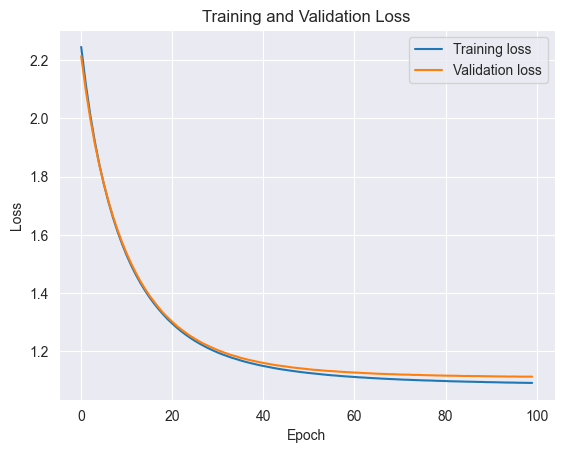

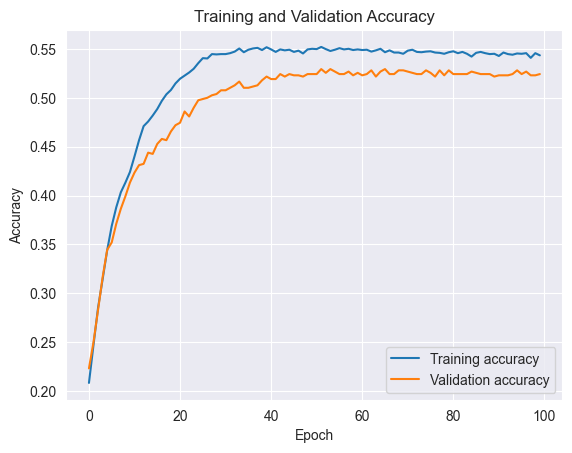

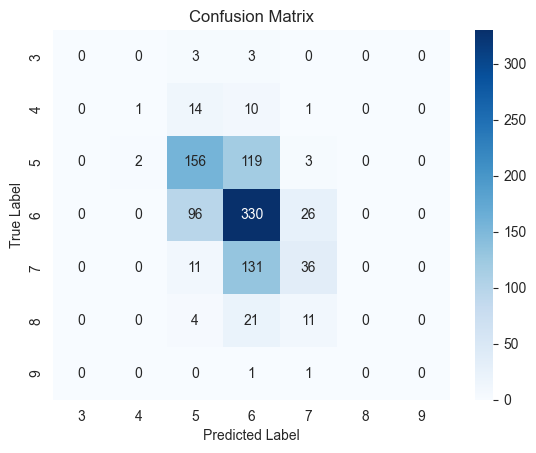

In [48]:
show_loss(history)
show_accuracy(history)
draw_confusion_matrix(y_pred, y_test)